In [3]:
# Modulos y datos
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D, Flatten

# Consideremos un optimizador
from keras.optimizers import SGD

# Dataset
from keras.datasets import mnist
(trainX, trainy),(testX, testy) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Dimensiones de los datos que tenemos
print("Entrenamiento X",trainX.shape)
print("Entrenamiento y", trainy.shape)
print("Test X", testX.shape)
print("Test y", testy.shape)

Entrenamiento X (60000, 28, 28)
Entrenamiento y (60000,)
Test X (10000, 28, 28)
Test y (10000,)


<ipython-input-7-eae0d1514fa7>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 +i)


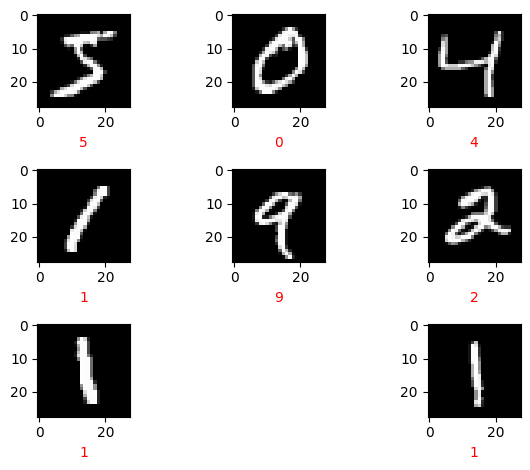

In [7]:
# Mostremos algunas imagenes
for i in range(9):
  # Definamos un subplot 331 332 333
  plt.subplot(330 + 1 +i)
  # Mostremos los pixeles que componen a una imagen
  plt.imshow(trainX[i], cmap = plt.get_cmap("gray"))
  # A cada imagen mostrada le agregaremos su correspondiente etiqueta
  plt.xlabel(trainy[i], color = "red")
  plt.tight_layout()
plt.show()

In [8]:
# Verifiquemos si es que la variable dependiente esta balanceada
# Numero de ocurrencias en cada clase de la variable dependientes
np.unique(trainy, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

<Axes: xlabel='Digitos'>

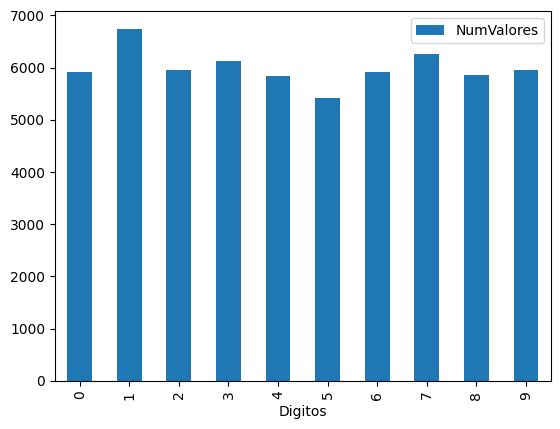

In [9]:
# Construyamos un objeto de tipo dataframe para observar esta informacion
df_digitos = pd.DataFrame.from_dict({
    "Digitos": np.unique(trainy, return_counts = True)[0],
    "NumValores" :np.unique(trainy, return_counts = True)[1]
})

df_digitos.set_index("Digitos").plot(kind = "bar")

In [15]:
# Preprocesamiento de las imagenes

# A las variables independientes necesito agregarle una dimension
# para el tensor del color
# Crearemos una variable dependiente categorica
def load_dataset(trainX, trainy, testX,testy):
  # Reestructuracion de las X
  trainX = trainX.reshape((trainX.shape[0], 28,28, 1))
  testX = testX.reshape((testX.shape[0], 28,28, 1))

  # OneHotEncoding para la variable dependiente
  from keras.utils import to_categorical
  trainy = to_categorical(trainy)
  testy = to_categorical(testy)

  # output
  return trainX, trainy, testX, testy

# Escalemos los pixeles
def prep_pixeles(train, test):
  # Convertimos los valores enteros de las variables independientes
  # a datos punto flotante
  train_norm = train.astype("float32")
  test_norm = test.astype("float32")

  # Normalizacion
  train_norm = train_norm/255.0
  test_norm = test_norm/255.0

  # output
  return train_norm, test_norm

In [16]:
# Preparemos los datos para pasarlos por la RNC
(trainX, trainy),(testX, testy) = mnist.load_data()

# Funciones de preprocesamiento
trainX, trainy, testX, testy = load_dataset(trainX, trainy, testX, testy)
trainX, testX = prep_pixeles(trainX, testX)

In [20]:
# Definamos una arquitectura convolucional
model = Sequential()

# Sucesion de pares de capas Convolucional-Pooling
model.add(Conv2D(filters = 19,
                 kernel_size = (3,3),
                 activation = "relu",
                 kernel_initializer="he_uniform",
                 input_shape =(28,28,1)
                 ))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 21,
                 kernel_size = (2,2),
                 activation = "relu",
                 ))
model.add(MaxPooling2D((3,2)))


# model.add(Conv2D(filters = 24,
#                  kernel_size = (3,3),
#                  activation = "selu",
#                  ))
# model.add(MaxPooling2D((3,3)))

# De la misma manera podemos agregar mas pares de capas

# Agreguemos una capa flatten
model.add(Flatten())

# Agregamos una capa de salida : Clasificador
model.add(Dense(units = 10,
                activation = "softmax"))

# Compilar mi red convolucional
opt_base = SGD(lr = 10**(-5), momentum=0.99)
model.compile(loss = "categorical_crossentropy",
              optimizer = opt_base,
              metrics = ["accuracy"])

# Ajustemos la nueva RNC
History = model.fit(trainX, trainy,
                    epochs = 10,
                    batch_size = 64,
                    validation_data = (testX, testy))

# Evaluacion del modelo
_,acc = model.evaluate(testX, testy)
print("Accuracy ====> %.3f" %(acc*100))


Epoch 1/10
938/938 [==============================] - 27s 28ms/step - loss: 0.2635 - accuracy: 0.9197 - val_loss: 0.1082 - val_accuracy: 0.9672
Epoch 2/10
938/938 [==============================] - 32s 34ms/step - loss: 0.1146 - accuracy: 0.9662 - val_loss: 0.0760 - val_accuracy: 0.9777
Epoch 3/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0856 - accuracy: 0.9750 - val_loss: 0.0701 - val_accuracy: 0.9797
Epoch 4/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0714 - accuracy: 0.9780 - val_loss: 0.0742 - val_accuracy: 0.9773
Epoch 5/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.0851 - val_accuracy: 0.9761
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0714 - val_accuracy: 0.9782
Epoch 7/10
938/938 [==============================] - 25s 26ms/step - loss: 0.0634 - accuracy: 0.9806 - val_loss: 0.0600 - val_accuracy: